In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import psycopg2
import config
from config import db_pw

In [5]:
#establishing the connection
conn = psycopg2.connect(
   database="Predictive_Senescence_DB", user='postgres', password= db_pw, host='predictive-senescence-db.cbunnafql9ym.us-east-2.rds.amazonaws.com', port= '5432'
)

#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''SELECT * from birds_data_raw''')

#Fetching 1st row from the table
df = pd.DataFrame(cursor.fetchall(), columns=["Collection_Num", "BirdID", "Sex", "AgeY", "AgeClass", "BirthFPID", "U_PlateID", "RTL", "Technician", "Terr", "FPID", "Mum", "Dad", "Mac", "Pac", "BRF", "BRM"]);
print(bird_df)

#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()

      Collection_Num  Bird_ID  Sex       Agey AgeClass  BirthFPID U_PlateID  \
0                  1     5511    0   0.246575        J        103       9_3   
1                  2     5559    1   3.597260        A        103       9_1   
2                  3     5559    1   4.715068        A        103      9_28   
3                  4     5559    1   0.657534       SA        103       9_2   
4                  5     5527    1   0.328767      OFL        103       9_3   
...              ...      ...  ...        ...      ...        ...       ...   
2657            2658      221    1   6.958904        A          8       2_1   
2658            2659      216    1   8.947945        A          8       8_8   
2659            2660      176    1   6.772603        A          8      7_32   
2660            2661      221    1   9.090411        A          8      1_12   
2661            2662      176    1  13.873973        A          8       4_3   

       RTL  Technician   Terr  FPID   Mum   Dad    

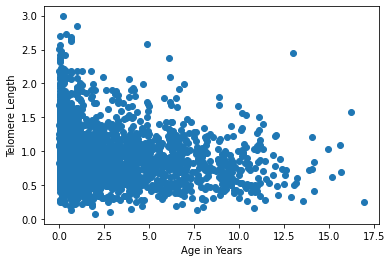

In [6]:
plt.scatter(df.AgeY, df.RTL)
plt.xlabel('Age in Years')
plt.ylabel('Telomere Length')
plt.show()

In [7]:
X= df.RTL.values.reshape(-1, 1)
y= df.AgeY

In [8]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(2662,)


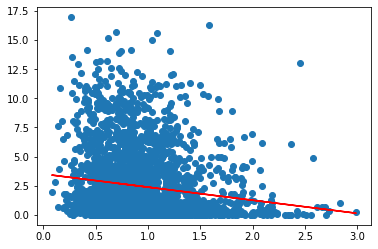

In [9]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [10]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[-1.12179147]
3.50481683113864


In [11]:
rtl= df.drop(["AgeClass"], axis=1)
rtl.head()

,Collection_Num,BirdID,Sex,AgeY,BirthFPID,U_PlateID,RTL,Technician,Terr,FPID,Mum,Dad,Mac,Pac,BRF,BRM
0,1,5511,0,0.246575,103,9_3,1.06,1,10.0,104,4863,1762,3.920548,7.443836,4863,1762
1,2,5559,1,3.597260,103,9_1,0.52,1,77.1,122,1716,1877,7.416438,6.235616,1716,4892
2,3,5559,1,4.715068,103,9_28,1.07,1,77.1,125,1716,1877,7.416438,6.235616,1716,4892
3,4,5559,1,0.657534,103,9_2,0.99,1,111.0,104,1716,1877,7.416438,6.235616,1716,4892
4,5,5527,1,0.328767,103,9_3,1.02,1,131.0,104,4936,1710,3.452055,7.778082,1707,1710


In [12]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler().fit_transform(rtl)
print(scaled[0:5])

[[-1.73140027  1.01789281 -1.03362279 -0.75763373  1.23519633 -1.60079312
   0.34822659 -0.60194159 -1.20377958  0.76891899  1.70102727 -0.0440819
  -0.09887322  0.811338    1.77634594 -0.16752922]
 [-1.73009896  1.04365779  0.96747093  0.38478172  1.23519633 -1.60734809
  -1.03063674 -0.60194159  0.65886935  1.2842923  -0.19201841  0.03174049
   1.0849135   0.43315724 -0.23469698  1.81101857]
 [-1.72879764  1.04365779  0.96747093  0.76589825  1.23519633  1.13590518
   0.37376109 -0.60194159  0.65886935  1.37018786 -0.19201841  0.03174049
   1.0849135   0.43315724 -0.23469698  1.81101857]
 [-1.72749633  1.04365779  0.96747093 -0.61751736  1.23519633 -1.6040706
   0.16948504 -0.60194159  1.59990956  0.76891899 -0.19201841  0.03174049
   1.0849135   0.43315724 -0.23469698  1.81101857]
 [-1.72619501  1.02648114  0.96747093 -0.72961046  1.23519633 -1.60079312
   0.24608856 -0.60194159  2.15509553  0.76891899  1.74493967 -0.07836681
  -0.25751548  0.91595944 -0.24044829 -0.20039966]]


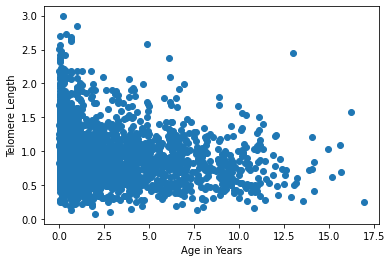

In [13]:
plt.scatter(rtl.AgeY, rtl.RTL)
plt.xlabel('Age in Years')
plt.ylabel('Telomere Length')
plt.show()

In [14]:
df.corr()

,Collection_Num,BirdID,Sex,AgeY,BirthFPID,RTL,Technician,Terr,FPID,Mum,Dad,Mac,Pac,BRF,BRM
Collection_Num,1.000000,0.010050,-0.010843,0.025156,-0.123863,0.049661,0.041613,0.023290,-0.062083,-0.192578,-0.237740,0.079115,0.079753,-0.227978,-0.274073
BirdID,0.010050,1.000000,-0.032030,-0.403396,0.935184,-0.098539,-0.441289,0.119533,0.791965,0.724816,0.664268,0.205630,0.291296,0.701200,0.672579
Sex,-0.010843,-0.032030,1.000000,0.004436,0.001982,0.009608,0.043039,0.010311,-0.010737,-0.017922,-0.004057,0.029889,-0.010271,-0.032811,0.009429
AgeY,0.025156,-0.403396,0.004436,1.000000,-0.377532,-0.149787,0.181264,-0.019821,0.132785,-0.313421,-0.297067,-0.129914,-0.137967,-0.289374,-0.280714
BirthFPID,-0.123863,0.935184,0.001982,-0.377532,1.000000,-0.108682,-0.414388,0.104718,0.793714,0.755436,0.713185,0.203714,0.257513,0.737550,0.721079
RTL,0.049661,-0.098539,0.009608,-0.149787,-0.108682,1.000000,0.130807,0.020662,-0.215980,-0.100940,-0.073263,0.029150,-0.054782,-0.106949,-0.092713
Technician,0.041613,-0.441289,0.043039,0.181264,-0.414388,0.130807,1.000000,-0.041270,-0.377542,-0.355608,-0.324802,-0.111527,-0.154038,-0.341033,-0.333520
Terr,0.023290,0.119533,0.010311,-0.019821,0.104718,0.020662,-0.041270,1.000000,0.107079,0.086748,0.080771,-0.025701,-0.019770,0.112451,0.076779
FPID,-0.062083,0.791965,-0.010737,0.132785,0.793714,-0.215980,-0.377542,0.107079,1.000000,0.622979,0.583284,0.165546,0.229753,0.609393,0.591722
Mum,-0.192578,0.724816,-0.017922,-0.313421,0.755436,-0.100940,-0.355608,0.086748,0.622979,1.000000,0.722729,-0.071095,0.261022,0.868633,0.627175
